# Partie 1: preparation des dataframes

## 1.1 Importation des librairies

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 


## 1.2 importation des dataframes

In [234]:

erp = pd.read_csv("./erp.csv")
liaison = pd.read_csv("./liaison.csv")
web = pd.read_csv("./web.csv")

## 1.3 Preparation des differents Dataframes

### Preparation du dataframe erp

In [235]:
erp.info()
print("la colonne product_id contient", len(erp['product_id'].unique())," valeurs uniques")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      825 non-null    int64  
 1   product_id      825 non-null    int64  
 2   onsale_web      825 non-null    int64  
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 38.8+ KB
la colonne product_id contient 825  valeurs uniques


Comme on peut le voir la colonne product_id possède 825 lignes. pour 825 valeurs uniques.  
Comme chaque product_id est unique on va pouvoir les utiliser comme clefs primaires

### Preparation du dataframe liaison

In [236]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  825 non-null    int64 
 1   product_id  825 non-null    int64 
 2   id_web      734 non-null    object
dtypes: int64(2), object(1)
memory usage: 19.5+ KB


Le fichier liaison possède 825 lignes.  
la colonne product_id posséde 825 valeurs uniques.  
Le fichier de liaison posséde autant de lignes que le fichier erp, 
une liaison devrait donc etre possible, en se basant sur la colonne product_id

### Creation d'un dataframe temporaire en fusionant 'Erp' et 'Liaison'

In [237]:
# fusion du fichier erp et de la table de liaison, grace au 'product_id' puis preparation pour la fusion avec le fichier web
# creation d'un df temporaire et fusion du fichier erp et de la table de liaison, grace au 'product_id'. 
df_temp = pd.merge(erp, liaison, on='product_id', how='left')
print(f'le nouveau fichier,temporaire possède {len(df_temp)} lignes,\n'
      f"soit autant que les fichiers erp et liaison, la fusion semble donc s'être passée correctement. \n")
df_temp.info()


le nouveau fichier,temporaire possède 825 lignes,
soit autant que les fichiers erp et liaison, la fusion semble donc s'être passée correctement. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0_x    825 non-null    int64  
 1   product_id      825 non-null    int64  
 2   onsale_web      825 non-null    int64  
 3   price           825 non-null    float64
 4   stock_quantity  825 non-null    int64  
 5   stock_status    825 non-null    object 
 6   Unnamed: 0_y    825 non-null    int64  
 7   id_web          734 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 58.0+ KB


On peut voir que la colonne id_web  possède 734 valeurs renseignées.

In [238]:
print("la colonne id_web posséde", len(df_temp['id_web'].unique())," valeurs uniques, et ",
        len(df_temp[df_temp['id_web'].isna()])," valeurs manquantes")

#Supression des lignes ou les valeurs 'id_web' sont manquantes
df_temp = df_temp.dropna(subset=["id_web"], axis=0)
df_temp.shape

la colonne id_web posséde 735  valeurs uniques, et  91  valeurs manquantes


(734, 8)

### Preparation du fichier Web

In [239]:
#Renommer la colonne sku en id_web pour correspondre au fichier liaison
web.rename(columns={"sku":"id_web"}, inplace=True)
web.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1513 non-null   int64  
 1   id_web                 1428 non-null   object 
 2   virtual                1513 non-null   int64  
 3   downloadable           1513 non-null   int64  
 4   rating_count           1513 non-null   int64  
 5   average_rating         1430 non-null   float64
 6   total_sales            1430 non-null   float64
 7   tax_status             716 non-null    object 
 8   tax_class              0 non-null      float64
 9   post_author            1430 non-null   float64
 10  post_date              1430 non-null   object 
 11  post_date_gmt          1430 non-null   object 
 12  post_content           0 non-null      float64
 13  post_title             1430 non-null   object 
 14  post_excerpt           716 non-null    object 
 15  post

On peut voir que:  
le fichier web possede 1513 lignes.  
La colonne id_web possede 1428 valeurs. 

In [240]:
print("Nombre de valeurs unique dans la colonne id_web:",len(web['id_web'].unique()))
web = web.sort_values(by=['id_web'], axis=0)
display(web[:4])


Nombre de valeurs unique dans la colonne id_web: 715


,Unnamed: 0,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
1399,1399,10014,0,0,0,0.0,0.0,NaN,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,NaN,Darnley's London Dry Gin Original,NaN,publish,closed,closed,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
628,628,10014,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-04-04 15:45:23,2019-04-04 13:45:23,NaN,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromati...",publish,closed,closed,NaN,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
255,255,10459,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,NaN,Alphonse Mellot Sancerre Rouge Génération XIX ...,"Robe d'un superbe rubis, dense et profond - As...",publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1046,1046,10459,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-13 15:58:19,2018-04-13 13:58:19,NaN,Alphonse Mellot Sancerre Rouge Génération XIX ...,NaN,publish,closed,closed,NaN,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [241]:
# on supprime donc les doublons
web.drop(web.loc[web['post_type']=='attachment'].index, inplace=True)
web.info()
print("\n La colonne id_web du fichier web possède" ,len(web[web['id_web'].isna()])," valeurs manquantes")



<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 628 to 796
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             799 non-null    int64  
 1   id_web                 714 non-null    object 
 2   virtual                799 non-null    int64  
 3   downloadable           799 non-null    int64  
 4   rating_count           799 non-null    int64  
 5   average_rating         716 non-null    float64
 6   total_sales            716 non-null    float64
 7   tax_status             716 non-null    object 
 8   tax_class              0 non-null      float64
 9   post_author            716 non-null    float64
 10  post_date              716 non-null    object 
 11  post_date_gmt          716 non-null    object 
 12  post_content           0 non-null      float64
 13  post_title             716 non-null    object 
 14  post_excerpt           716 non-null    object 
 15  post

Chaque id_web est maintenant unique.  
On va donc pouvoir utiliser cette colonne comme clef primaire pour proceder a la fusion entre le dataframe de liaison et le dataframe temporaire.


### Jointure entre le fichier temporaire et le fichier web

In [242]:
# fusion entre df_temp et web en utilisant id_web.
new= pd.merge(df_temp, web, on='id_web', how='inner')
#display(new)
new.shape


(714, 36)

Après fusion entre df_temp et  web 
 il nous reste bien 714  lignes
La fusion a donc été effectuée avec les données renseignées


In [243]:
new = new.drop(['Unnamed: 0_x'],axis=1)


# Partie 2: Analyse du datafarme et de la variable "Price"

## 2.1 Le chiffre d'affaires

In [260]:
new['chiffre_affaire']= new['price'] * new['total_sales'] #Assigner une nouvelle col avec le CA par produit
chiffre_total= new['chiffre_affaire'].sum()
print("Le chiffre d'affaire total est de:" , chiffre_total)

display(new[:1])



Le chiffre d'affaire total est de: 70568.6


,product_id,onsale_web,price,stock_quantity,stock_status,Unnamed: 0_y,id_web,Unnamed: 0,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,chiffre_affaire
0,3847,1,24.2,0,outofstock,0,15298,1,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2


## 2.2 analyse de la variable "Price"

In [245]:
new[["price"]].describe()

,price
count,714.000000
mean,32.493137
std,27.810525
min,5.200000
25%,14.100000
50%,23.550000
75%,42.175000
max,225.000000


In [246]:

# Calcul de la moyenne et de la mediane de la colonne price
moyenne =  new['price'].mean()
mediane =  new['price'].median()
print("La moyenne des prix est de :", round(moyenne,1), "Euros")
print("La mediane de la colonne prix est :", round(mediane, 1), "Euros")

La moyenne des prix est de : 32.5 Euros
La mediane de la colonne prix est : 23.6 Euros


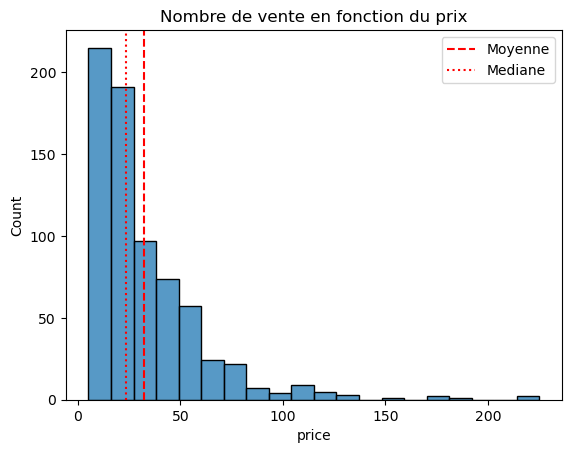

In [247]:


sns.histplot(data = new["price"], bins=20)

plt.title("Nombre de vente en fonction du prix")
plt.axvline(moyenne, color="r", linestyle="--")
plt.axvline(mediane, color="r", linestyle=":")
plt.legend({"Moyenne":moyenne,"Mediane":mediane})



## 2.3 Presentation de la variable Price sous forme de tableau

In [248]:
effectifs = new["price"].value_counts(bins=4)
modalites = effectifs.index #l'index des effectifs contient les modalités
tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["frequence"] = (tab["n"] / len(new)) *100
display(tab)

,price,n,frequence
0,"(4.979, 60.15]",634,88.795518
1,"(60.15, 115.1]",66,9.243697
2,"(115.1, 170.05]",9,1.260504
3,"(170.05, 225.0]",5,0.700280


In [249]:
tab = tab.sort_values("price") # tri des valeurs de la variable tab (croissant)
tab["frequence_cum"] = tab["frequence"].cumsum() #Calcule la somme cumulée
display(tab)


,price,n,frequence,frequence_cum
0,"(4.979, 60.15]",634,88.795518,88.795518
1,"(60.15, 115.1]",66,9.243697,98.039216
2,"(115.1, 170.05]",9,1.260504,99.299720
3,"(170.05, 225.0]",5,0.700280,100.000000


## 2.4 Mesure de la tendance centrale

In [250]:
mode = new["price"].mode()
print(f"Le mode est la valeur que l'on retrouve le plus souvent dans la colonne 'price'. \n",mode[0] , 
"est donc le mode ")


Le mode est la valeur que l'on retrouve le plus souvent dans la colonne 'price'. 
 19.0 est donc le mode 


## 2.5 Mesures de dispersion

In [251]:
variance = new["price"].var(ddof=0)
print("La variance est l’écart carré moyen entre chaque donnée et la moyenne.\n",
"Ici la variance est donc de : ",round(variance, 2))

La variance est l’écart carré moyen entre chaque donnée et la moyenne.
 Ici la variance est donc de :  772.34


In [252]:
ecart_type = new['price'].std()
print("L'ecart type de la colonne 'price' est de : ",round(ecart_type,2))

L'ecart type de la colonne 'price' est de :  27.81


In [253]:
# Detection numerique des outliers:
Q1 = new["price"].quantile(q=0.25, interpolation="midpoint")
Q3 = new["price"].quantile(q=0.75, interpolation="midpoint")
Iq = Q3 - Q1

Outliers_Inf_limite = Q1-1.5 * Iq
Outliers_Sup_limite = Q3+1.5 * Iq

Outliers_Inf = new["price"] < Outliers_Inf_limite
Outliers_Sup = new["price"] > Outliers_Sup_limite

print("Limite pour les outliers inferieurs:\n", Outliers_Inf_limite)
print("Les indexs des outliers inferieurs sont:\n", np.where(Outliers_Inf)[0])

print("Limite pour les outliers superieurs:\n", Outliers_Sup_limite )
print("Les indexs des outliers superieurs sont:\n", np.where(Outliers_Sup)[0])
display(new.loc[(new["price"]>Outliers_Sup_limite),("price","post_title")])


Limite pour les outliers inferieurs:
 -27.975
Les indexs des outliers inferieurs sont:
 []
Limite pour les outliers superieurs:
 84.22500000000001
Les indexs des outliers superieurs sont:
 [ 63  65 199 201 205 218 219 221 222 227 380 381 426 431 432 437 438 502
 511 553 587 602 603 604 642 647 648 653 654 655 656 657]


,price,post_title
63,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...
65,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
199,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008
201,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs
205,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...
218,176.0,Cognac Frapin VIP XO
219,108.5,Cognac Frapin Château de Fontpinot XO
221,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...
222,104.0,Cognac Frapin Cigar Blend
227,109.6,Château de Meursault Puligny-Montrachet 1er Cr...


Pour le calcul des outliers:  
Sachant que:  
IQ = écart interquartile  
Q1 = premier quartile.   
Q2 = deuxieme quartile.   
Q3 = troisième quartile  
Les valeurs en dessous de Q1- 1,5 x IQ et au-dessus de Q3 + 1,5 x IQ  seront considérées comme des outliers.  
  
La limite inférieure étant négative (-27.97) il est logique qu'aucun outlier inférieur n'existe (un prix ne peut pas être négatif).  
On vérifie tout de même en affichant les index pour lesquels l'affirmation serait juste.

La limite supérieure est elle de 84,22€ sachant que la valeur maximale est de 225€.  
   

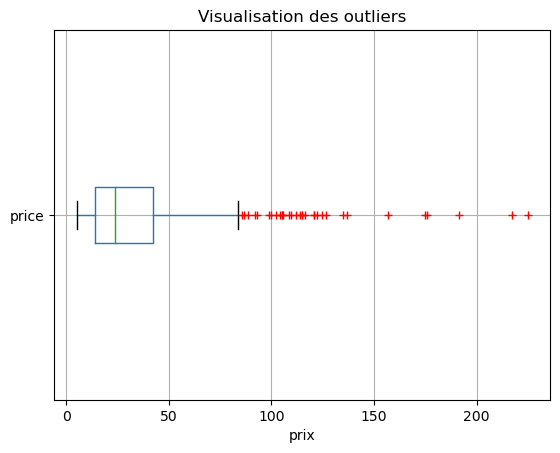

In [254]:
# Verification visuel des outliers grace a un boxplot
new.boxplot(column=["price"], vert=False, sym = 'r+' )
plt.xlabel("prix")
plt.ylabel("")

plt.title("Visualisation des outliers")
plt.show()

On peut voir sur ce boxplot la representation visuelle des outliers. 
On peut constater que comme lors de notre calcul de detection des outliers, il n'y a pas d'outlier inferieur.
On peut egalement constater que les outliers superieurs commencent bien autour de 80.

## 2.6 Mesures de forme

In [255]:
skewness = new['price'].skew()
print("On se rend compte dans notre cas que la mesure de forme est de ",skewness,
 ". Etant donne que cette valeur est superieur a 0 on peut en deduire que le mode est inferieur a la mediane ")

On se rend compte dans notre cas que la mesure de forme est de  2.58090126300337 . Etant donne que cette valeur est superieur a 0 on peut en deduire que le mode est inferieur a la mediane 


## 2.7 Analyse des ventes

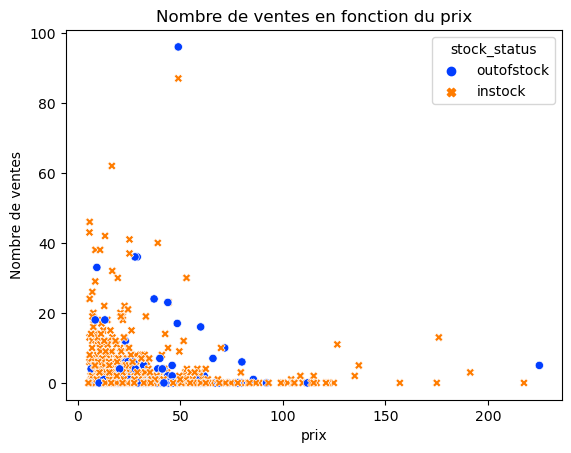

In [256]:
sns.scatterplot(data=new, x="price", y="total_sales",
                hue="stock_status" ,
                style="stock_status",
                palette="bright",
                )
plt.title("Nombre de ventes en fonction du prix")
plt.xlabel("prix")
plt.ylabel("Nombre de ventes")

plt.show()

In [257]:
# Meilleur vente   en ligne

meilleur_ventes = new.loc[(new["onsale_web"]==1),("id_web","total_sales","price","chiffre_affaire","stock_status")]
meilleur_ventes.sort_values(by="total_sales",ascending=False, inplace=True )
display(meilleur_ventes[:10])

                                                                                                                            

,id_web,total_sales,price,chiffre_affaire,stock_status
194,7818,96.0,49.0,4704.0,outofstock
71,1662,87.0,49.0,4263.0,instock
30,16416,62.0,16.6,1029.2,instock
119,16295,46.0,5.8,266.8,instock
97,16210,43.0,5.7,245.1,instock
109,16189,42.0,13.3,558.6,instock
651,16580,41.0,25.2,1033.2,instock
69,304,40.0,39.0,1560.0,instock
625,16264,38.0,10.9,414.2,instock
324,38,38.0,8.6,326.8,instock


On peut voir que le produit qui a le plus de vente est actuelement en rupture de stock


# 3. Conclusion:  
## Preparation des donnees:  
-Repérage des clés primaires pour pouvoir fusionner les dataframes.   
-Repérer les valeurs manquantes.  
-Supprimer les doublons dans le fichier web, il n'est pas necessaire d'avoir deux lignes par produit aves les meme données.  
-Renommer correctement la colonne sku -> id_web.

## Analyse de la variable price.  
-Le prix median d'une bouteille de vin est de 32 euros.  
-Le prix moyen est de 23,5 euros.  
-88% des produits vendus ont un prix inferieur a 60 euros et 98% des produits ont un prix inferieur a 110 euros.  
-Les valeurs considerées comme des outliers sonts les prix superieurs a 84 Euros. Meme si ces valeurs sont extremes elles restent juste dans ce contexte.  